Команда: Карепин Денис, Колпикова Ксения, Жарков Григорий

**Вариант 5**

Техническое задание:
Цель работы: реализовать алгоритмы одномерной минимизации функции без производной:
1.	Метод дихотомии.
2.	Метод Фибоначчи.
3.	Метод золотого сечения.
4.	Метод парабол.
5.	Комбинированный метод Брента.


Сравнить методы по количеству итераций функции и зависимости от разной точности.


In [ ]:
import numpy as np

def f(x):
    return np.exp(np.sin(x)) * x * x

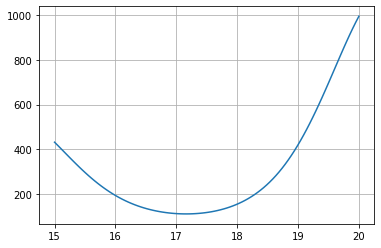

In [ ]:
import matplotlib.pyplot as plt

a = 15
b = 20

X = np.linspace(a, b, 100)
plt.grid()
plt.plot(X, f(X))

# Метод дихотомии

In [ ]:
def dichotomy_method(f, a, b, eps=1e-5):
        n = 0
        invocation = 0
        while abs(a - b) > eps / 2:
            x1 = (a + b) / 2 - eps/2
            x2 = (a + b) / 2 + eps/2

            fx1 = f(x1)
            fx2 = f(x2)
            if fx1 > fx2:
                a = x2
            elif fx1 < fx2:
                b = x1
            elif fx1 == fx2:
                a = x2
                b = x1
            n += 1

        return x1, n
 
 
x, n = dichotomy_method(f, a, b)
print(x)
print(f(x))
print(n)

17.16194538896561
109.09334970863344
19


# Метод Фиббоначи


In [ ]:
def fibonacci_numbers(n):
  F1 = 1
  F2 = 1
  for _ in range(n):
    F1, F2 = F2, F1 + F2
  return F1

def fibonacci_method(f, a, b, eps=1e-5):
  n = 11
  iteration = 0
  invocation = 0
  Fn = fibonacci_numbers(n)

  x1 = a + (b - a) * (fibonacci_numbers(n - 2) / Fn)
  x2 = a + (b - a) * (fibonacci_numbers(n - 1) / Fn)

  fx1 = f(x1)
  fx2 = f(x2)
  k = 1
  while k < n:
    if (fx1 < fx2):
      b = x2
      x2 = x1
      x1 = a + b - x2
      fx2 = fx1
      fx1 = f(x1)
    elif (fx1 > fx2):
      a = x1
      x1 = x2
      x2 = a + b - x1
      fx1 = fx2
      fx2 = f(x1)
    k += 1
    iteration += 1
  return (x1 + x2) / 2, iteration


x, n = fibonacci_method(f, a, b)
print(x)
print(f(x))
print(n)

17.135416666666668
109.13121459776166
10


# Метод Золотого сечения

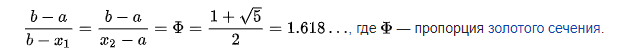

In [ ]:
def golden_ratio_method(f, a, b, eps=1e-5):
  n = 0
  invocation = 0
  x1 = b - (b - a) / 1.618
  x2 = a + (b - a) / 1.618

  y1 = f(x1)
  y2 = f(x2)
  while (b - a) / 2 > eps:
    if y1 > y2:
        a = x1
        x1 = x2
        x2 = b - (x1 - a)
        y1 = y2
        y2 = f(x2)
    else:
        b = x2
        x2 = x1
        x1 = a + (b - x2)
        y2 = y1
        y1 = f(x1)
    n+=1
  return (a+b) / 2, n

x, n = golden_ratio_method(f, a, b)
print(x)
print(f(x))
print(n)

17.2095179233623
109.2153306174455
14


# Метод парабол

In [ ]:
from numpy import linalg
from numpy.linalg.linalg import LinAlgError

def parabola_method(f, x1, x3, eps=1e-5):
    x2 = (x1 + x3) / 2
    n = 0
    prev = 0

    f_left = f(x1)
    f_right = f(x2)
    f_centre = f(x3)

    while True:
        matrix_a = np.array([[x1**2, x1, 1], 
                          [x2**2, x2, 1], 
                          [x3**2, x3, 1]])
        matrix_b = np.array([f_left, f_centre, f_right])
        try:
            res = linalg.solve(matrix_a, matrix_b)
        except LinAlgError:
            print("решение не может быть найдено")
            break

        a1 = res[0];
        a2 = res[1]
        a3 = res[2]

        u = -a2/(2*a1)

        f_peak = f(u)

        if f_peak < f_centre:
            if u <= x2:
                x3 = x2
                f_centre = f_peak
                f_right = f_centre
            else:
                x1 = x2
                x2 = u
                f_left = f_centre
                f_centre = f_peak
        else:
            if u <= x2:
                x1 = u
                f_left = f_peak
            else:
                x3 = u
                f_right = f_peak

        n += 1
        prev = u

        if abs(prev - u) < eps:
          break

    return u, n
    
x, n = parabola_method(f, a, b)
print(x)
print(f(x))
print(n)

17.227253795184314
109.32350649013539
1


# Комбинированный метод Брента

In [ ]:
from numpy.linalg.linalg import LinAlgError

def brent_method(f, a, b, eps=1e-5):
  r = 0.382
  x, w, v = a + r * (b - a), a + r * (b - a), a + r * (b - a)
  d_cur, d_prev = b - a, b - a

  n = 0
  
  fx = f(x)
  fw = f(x)
  fv = f(x)

  while max(x - a, b - x) >= eps:
    g, d_prev = d_prev / 2, d_cur
    y = [[x**2, x, 1], [w**2, w, 1], [v**2, v, 1]]
    z = [fx, fw, fv]  

    try:
      ans = np.linalg.solve(y, z)
      u = -ans[1] / (2 * ans[0])
    except LinAlgError:
      if (x < (a + b) / 2):
        u, d_prev = x + r * (b - x), b - x
      else:
        u, d_prev = x - r * (x - a), x - a

    d_cur = abs(u - x)
    fu = f(u)
    if fu > fx:
      if u < x:
        a = u
      else:
        b = u
      if fu <= fw or w == x:
        fv = fw
        v, w = w, u
        fw = fu
      else:
        if fu <= fv or x == v or v == w:
          v = u
          fv = fu
    else:
      if u < x:
        b = x
      else:
        a = x
    
    fv = fw
    fw = fx
    fx = fu
    
    v, w, x = w, x, u
    n += 1
  return x, n

x, n = brent_method(f, a, b)
print(x)
print(f(x))
print(n)

17.161956119038315
109.09334970099653
9
